In [2]:
# upload some important libraries for data cleaning, analysis, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# upload csv Netflix data  for analysis 
df = pd.read_csv('mymoviedb.csv')
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,12/15/2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,3/1/2022,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2/25/2022,No Exit,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,11/24/2021,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,12/22/2021,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
# know about the data which type of data and their column data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9826 entries, 0 to 9825
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9826 non-null   object 
 1   Title              9826 non-null   object 
 2   Popularity         9826 non-null   float64
 3   Vote_Count         9826 non-null   int64  
 4   Vote_Average       9826 non-null   float64
 5   Original_Language  9826 non-null   object 
 6   Genre              9826 non-null   object 
 7   Poster_Url         9826 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 614.3+ KB


&#9679; In this data a little mistake Release_Date data types is object so it need to convert into date datatypes and retrive year from this for further analysis

In [5]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)


datetime64[ns]


In [6]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

&#9670; Now drop unwanted column which are not important for our analusis 


In [7]:
# create a list of unwanted columns and drop them from data
cols = ['Original_Language','Poster_Url']
df.drop(cols, axis=1, inplace=True, errors='ignore')
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


&#9670; From analysis we want to know which movie is more popular by their Rating, and Rating in data is a number format which is not better understood so now convert them into four string word like popular,Average,below average, not popular 

In [8]:
# Build a function to convert numeric data into  stings 
def catigorical_col(df, col, labels):
    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges,labels=labels, duplicates='drop')
    return df

In [9]:
# create labels list for interchange
labels = ['Not_Popular','Below_avg','Average','Popular']
catigorical_col(df, 'Vote_Average', labels)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_avg,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [10]:
df.nunique()

Release_Date     102
Title           9512
Popularity      8159
Vote_Count      3266
Vote_Average       4
Genre           2337
dtype: int64

In [11]:
df.describe()

,Release_Date,Popularity,Vote_Count
count,9826.000000,9826.000000,9826.000000
mean,2006.202931,40.323951,1392.943721
std,15.686202,108.879332,2611.303856
min,1902.000000,13.354000,0.000000
25%,2000.000000,16.128250,146.000000
50%,2011.000000,21.195000,444.000000
75%,2017.000000,35.179250,1376.000000
max,2024.000000,5083.954000,31077.000000


In [12]:
# Counts which movie is most popular in the last few years 
Rating = df['Vote_Average'].value_counts()
print(Rating)

Vote_Average
Not_Popular    2467
Popular        2450
Average        2411
Below_avg      2398
Name: count, dtype: int64


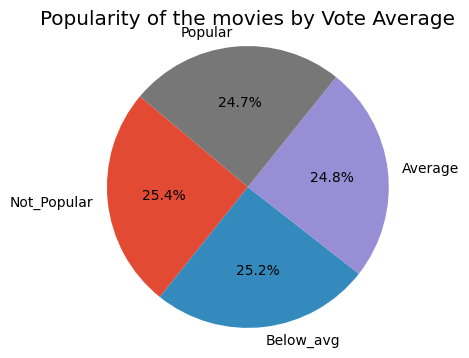

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(4,4))
plt.pie(Rating, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Popularity of the movies by Vote Average')
plt.axis('equal')
plt.show()

&#9670; Genre is important column but in this  mutliple catergories is situated due to we cannot find which type of movie popular or not_popular

In [14]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [15]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [16]:
# Drop null values from the data and check them
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [17]:
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [18]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


# Visualization and Analysis of the data 

In [29]:
# Set the Style of the visualization or graph
sns.set_style('whitegrid')
sns.set_palette('dark')
sns.set_context('paper')

# What is most frequent genre of movie release on the netflix

In [21]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

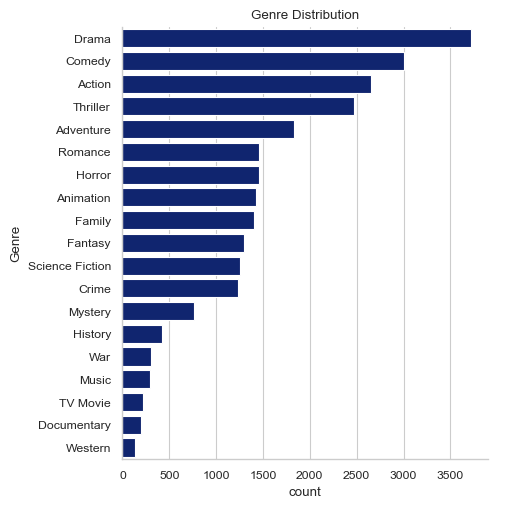

In [34]:
sns.catplot(data=df, kind='count', y = 'Genre', order = df['Genre'].value_counts().index)
plt.title("Genre Distribution")
plt.show()

&#9679; 📊 After analyzing the genre distribution of movies on the Netflix platform, we found that:<br>
&#9679; ✅ Drama is the most frequently available genre, dominating the content library. This indicates a strong viewer preference or content strategy          focused on emotionally engaging, story-driven content.<Br>
&#9679; ⚠️ On the other hand, Western movies are the least represented genre on Netflix, suggesting either low demand or limited production in this             category.<br>&#9679;📈 This insight can help content teams, marketers, and data analysts understand platform focus and identify potential genre gaps.

# Which has highest vote in the vote average column?

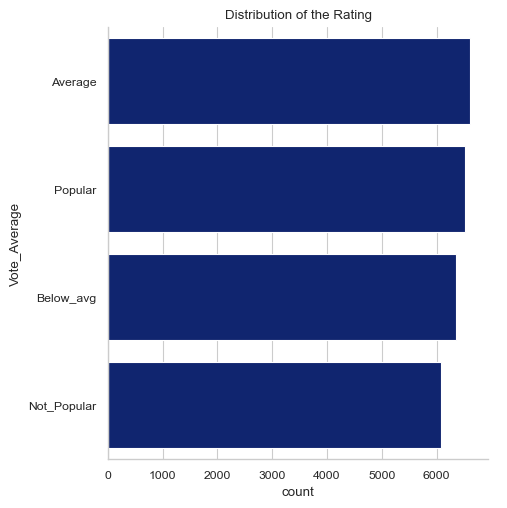

In [39]:
sns.catplot(y = 'Vote_Average', kind='count', data = df , order= df['Vote_Average'].value_counts().index)
plt.title('Distribution of the Rating')
plt.show()

● This indicates that the majority of movies on the platform tend to receive mid-level (average) audience ratings, suggesting a large portion of the content is neither extremely good nor bad, but falls into the average quality range.

# What Genre has  highest vote_Average/Rating?

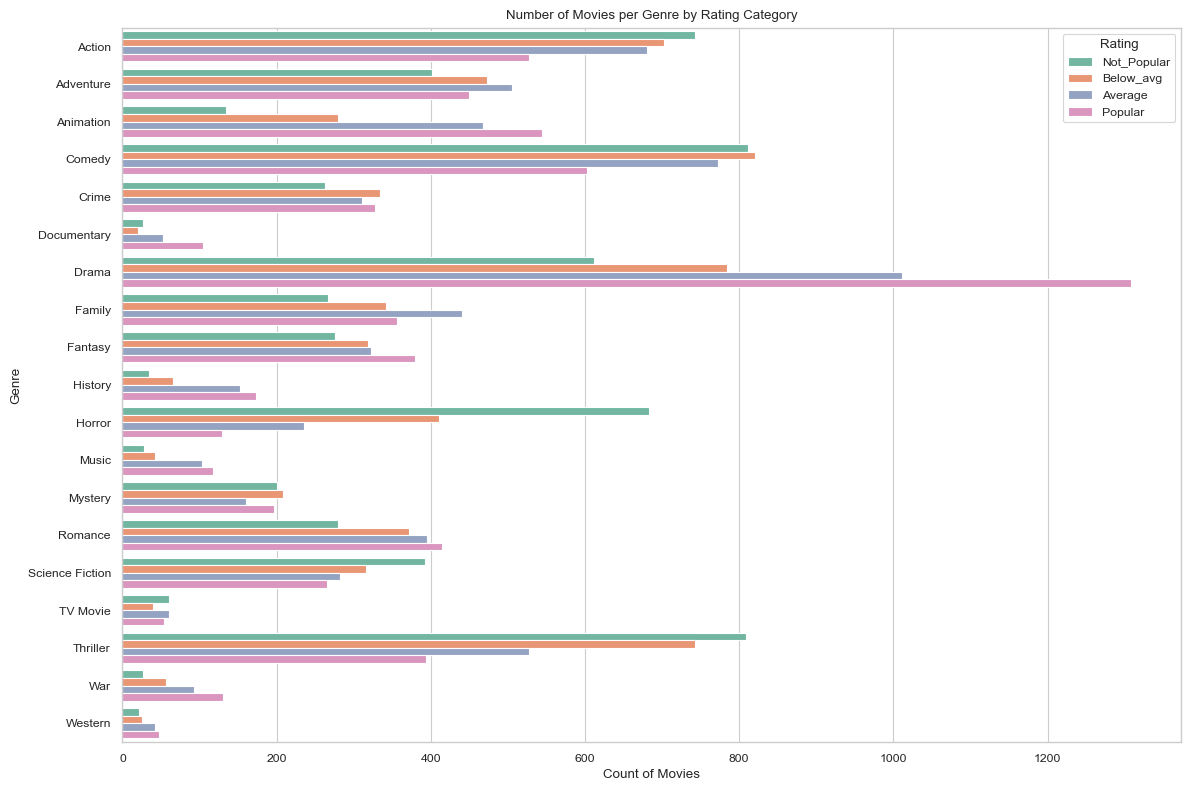

In [49]:
plt.figure(figsize=(12, 8))
sns.countplot(data = df, y='Genre', hue='Vote_Average', palette='Set2')

plt.title("Number of Movies per Genre by Rating Category")
plt.xlabel("Count of Movies")
plt.ylabel("Genre")
plt.legend(title='Rating')
plt.tight_layout()
plt.show()


# What movie got the lowest popularity? what's its genre?


In [43]:
df[df['Popularity']  ==  df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25786,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25787,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25788,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25789,1984,Threads,13.354,186,Popular,War
25790,1984,Threads,13.354,186,Popular,Drama
25791,1984,Threads,13.354,186,Popular,Science Fiction


The united states, thread' has the highest lowest rate in our dataset
and it has genres of music , drama , 'war', 'sci-fi' and history`.

# What movie got the highest popularity? what's its genre?


In [44]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


Spider-Man: No Way Home has the Highest popularity in our dataset and it has genre action, adventure, Science Fiction

# Which year has the most filmmed movies?


 Most movies Release in : Release_Date
2021    1636
2018    1384
2017    1365
2019    1271
2016    1209
        ... 
1920       4
1902       3
1925       2
1929       2
1930       2
Name: count, Length: 100, dtype: int64 (1636 film)


<function matplotlib.pyplot.show(close=None, block=None)>

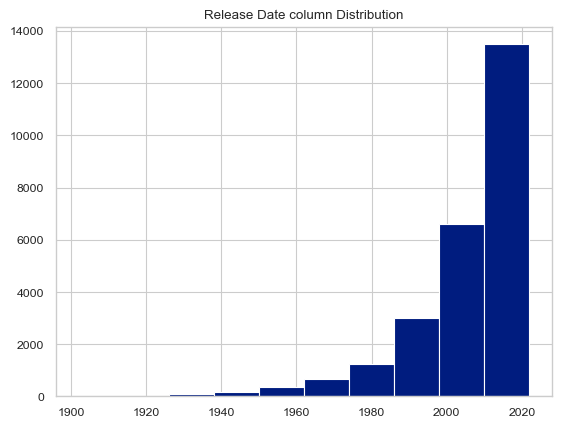

In [52]:
Most_common_year = df['Release_Date'].value_counts()
film_count = df['Release_Date'].value_counts().max()
print(f" Most movies Release in : {Most_common_year} ({film_count} film)")
df['Release_Date'].hist()
plt.title('Release Date column Distribution')
plt.show

🎬 2020 was the most active year for film releases on Netflix